<img src="https://www.insidehighered.com/sites/default/server_files/media/california_0.jpg" width=400>  


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory

Acknowledgements:
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
CA_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"

ca = pd.read_csv(CA_url)
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Q1: show the number of missing data in each column of the dataframe

In [ ]:
# Your code here . . .
ca.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### Q2: show the data type for each column of the dataframe

In [ ]:
# Your code here . . .
ca.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


### Q3: Plot a regression line and confidence interval
Create a lmplot that shows the linear regression between `median_income` and `median_house_value`. Only use data with `median_housing_value` < 500000. Include a meaningful title for the plot.

Text(0.5, 1.0, 'Linear Regression between Median Income and Median House Value (Below $500,000)')

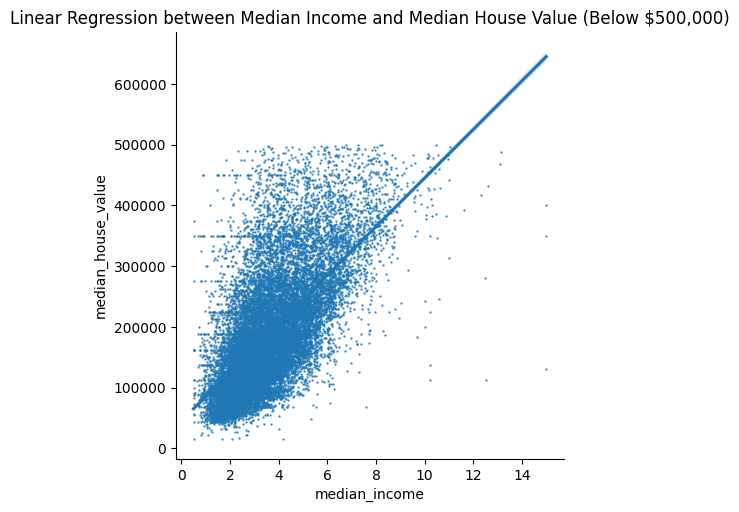

In [ ]:
# Your code here . . .
filter_median_house_value = ca[ca['median_house_value'] < 500000]
sns.lmplot(data=filter_median_house_value,
           x="median_income",
           y="median_house_value",
           markers='.',
           scatter_kws={'s':2})
plt.title('Linear Regression between Median Income and Median House Value (Below $500,000)')

### Q4: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

Text(0.5, 1.0, 'Polynomial Regression between Median Income and Median House Value (Below $500,000)')

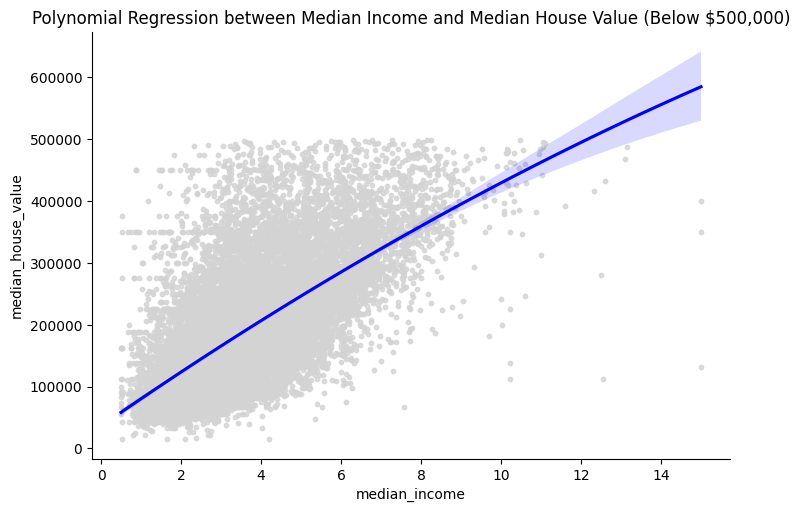

In [ ]:
# Your code here . . .
sns.lmplot(
    data=filter_median_house_value,
    x="median_income",
    y="median_house_value",
    order=2,  # Fit a second-order (polynomial) regression
    scatter_kws={'s': 10, 'color': 'lightgray'},  # Use light color for points to deemphasize
    line_kws={'color': 'blue'},  # Use a distinct color for the regression line
    aspect=1.5
)

# Add a meaningful title to the plot
plt.title('Polynomial Regression between Median Income and Median House Value (Below $500,000)')


### Q5. Create a relplot that shows the `median_income` and `median_house` along with the `longitude` and `latitude`.
Plot `longitude` along the x-axis and `latitude` along the y-axis. Use `hue` to display the `median_house_value` and the size of the data point `median_income`. Include a meaningful title to the plot.

Text(0.5, 1.0, 'Geographical Distribution of House Values and Incomes in California')

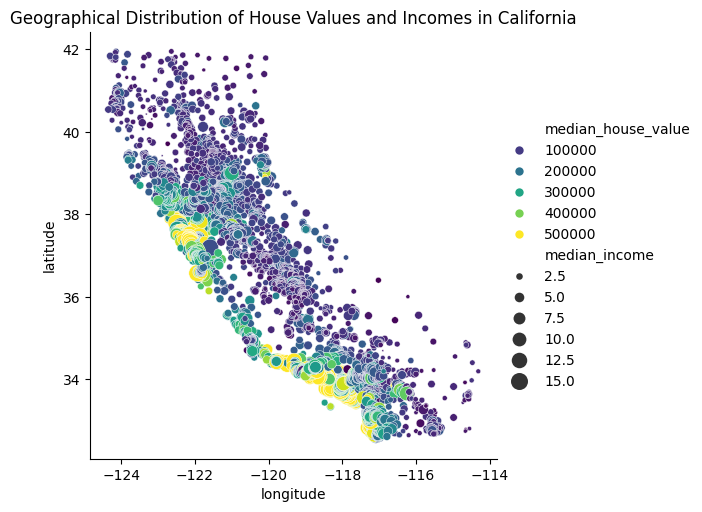

In [ ]:
# Your code here . . .
sns.relplot(
    data=ca,
    x="longitude",
    y="latitude",
    size="median_income",
    sizes=(2,150),
    hue="median_house_value",
    palette="viridis"
)
plt.title("Geographical Distribution of House Values and Incomes in California")

### Q6: Create a plot with small multiples plots
The small multiple plots should show the relationship between `median_house_value` vs `median_income` using `ocean_proximity` as the single category. Only use data with `median_house_value` < 500000. Organize the multiple plots to have 2 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

Text(0.5, 1.03, 'Relationship Between Median House Value and Median Income by Ocean Proximity')

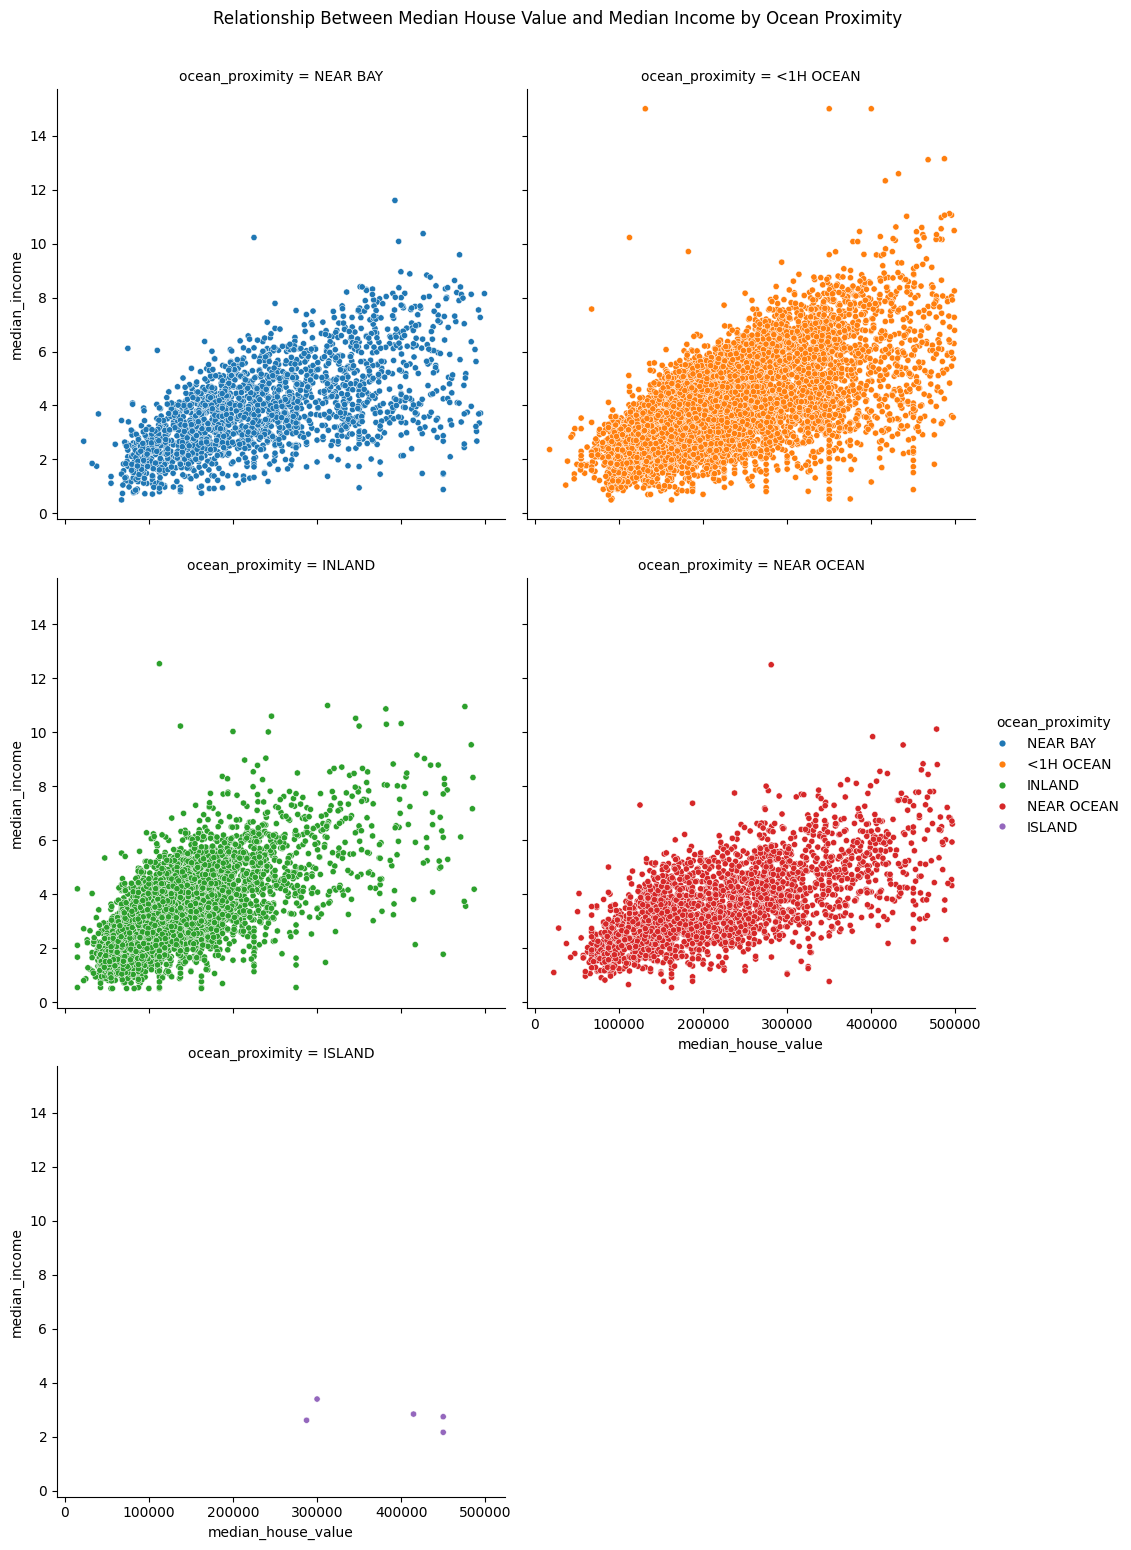

In [ ]:
# Your code here . . .
g=sns.relplot(
    data=filter_median_house_value,
    x="median_house_value",
    y="median_income",
    hue="ocean_proximity",
    col="ocean_proximity",
    col_wrap=2,
    height=5,
    s=20
)
g.fig.suptitle("Relationship Between Median House Value and Median Income by Ocean Proximity", y=1.03)